In [82]:
import sys
sys.path.append('/content/window.py')
from window import window_input_output

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Import data

In [84]:
df = pd.read_csv('/content/Conventional.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,117454,429518,5554
1,2015-01-11,110974,427723,5358
2,2015-01-18,151977,500684,4225
3,2015-01-25,140914,422435,4945
4,2015-02-01,217716,608156,5736


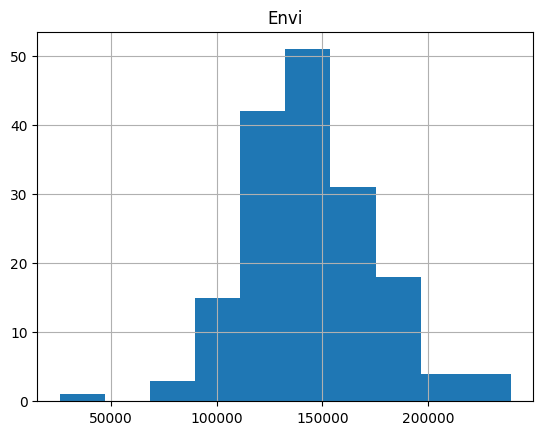

In [85]:
data = df[['Envi']]
data.hist();

# window shift 26 columns

In [86]:
seq_df = window_input_output(26, 26, data)
seq_df

,Envi,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25
51,93034,113404.0,96222.0,111259.0,85241.0,100048.0,98270.0,113965.0,140330.0,106239.0,...,118578.0,101528.0,153410.0,116908.0,153584.0,217716.0,140914.0,151977.0,110974.0,117454.0
52,114122,93034.0,113404.0,96222.0,111259.0,85241.0,100048.0,98270.0,113965.0,140330.0,...,160422.0,118578.0,101528.0,153410.0,116908.0,153584.0,217716.0,140914.0,151977.0,110974.0
53,146631,114122.0,93034.0,113404.0,96222.0,111259.0,85241.0,100048.0,98270.0,113965.0,...,131882.0,160422.0,118578.0,101528.0,153410.0,116908.0,153584.0,217716.0,140914.0,151977.0
54,118600,146631.0,114122.0,93034.0,113404.0,96222.0,111259.0,85241.0,100048.0,98270.0,...,160679.0,131882.0,160422.0,118578.0,101528.0,153410.0,116908.0,153584.0,217716.0,140914.0
55,25727,118600.0,146631.0,114122.0,93034.0,113404.0,96222.0,111259.0,85241.0,100048.0,...,156967.0,160679.0,131882.0,160422.0,118578.0,101528.0,153410.0,116908.0,153584.0,217716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,166753,159851.0,234996.0,234985.0,181752.0,147298.0,178992.0,184830.0,127053.0,142027.0,...,147251.0,145243.0,162810.0,164061.0,136194.0,150611.0,158589.0,152539.0,138467.0,142858.0
165,192776,166753.0,159851.0,234996.0,234985.0,181752.0,147298.0,178992.0,184830.0,127053.0,...,166017.0,147251.0,145243.0,162810.0,164061.0,136194.0,150611.0,158589.0,152539.0,138467.0
166,159389,192776.0,166753.0,159851.0,234996.0,234985.0,181752.0,147298.0,178992.0,184830.0,...,145487.0,166017.0,147251.0,145243.0,162810.0,164061.0,136194.0,150611.0,158589.0,152539.0
167,163394,159389.0,192776.0,166753.0,159851.0,234996.0,234985.0,181752.0,147298.0,178992.0,...,172557.0,145487.0,166017.0,147251.0,145243.0,162810.0,164061.0,136194.0,150611.0,158589.0


# Split data

In [87]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Envi')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [88]:
model = DecisionTreeRegressor(random_state = 123)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Score

In [89]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Envi):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Envi):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Envi): 1610993216.1394231
Mean Absolute Error (Envi): 30520.366987179485
R-squared (Test score) -1.5202727892799939
Train score 1.0


# Visualization

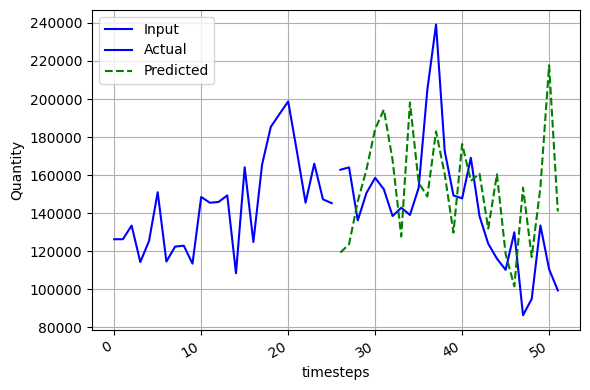

In [90]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 26, 1), X_test.iloc[1, ], 'b-', label='Input')
ax.plot(np.arange(26, 52, 1), y_test.iloc[1, ], color='blue', label='Actual')
ax.plot(np.arange(26, 52, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

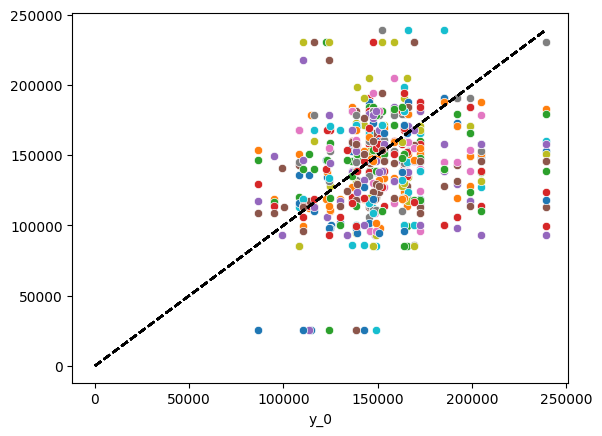

In [91]:
for i, col in enumerate(y_test.columns):
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')